<a href="https://colab.research.google.com/github/Sebastorres07/Modelado-y-Simulacion/blob/master/02_Simulations_(Numerical_Approximation_of_Solutions).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error máximo RK4 vs. exacta en [0.0, 6.0] con H=0.01: 4.511e-11 rad


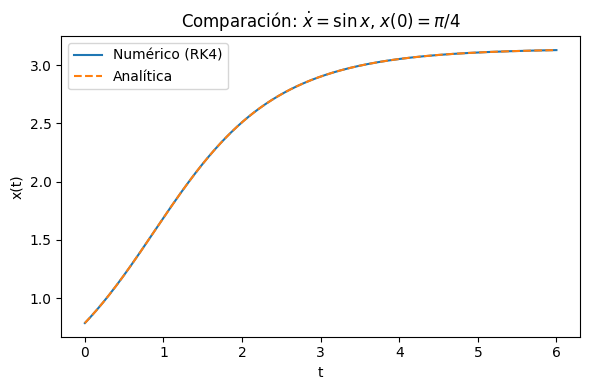

In [3]:
# ===============================================================
# Ejercicio 2.1.4 — Strogatz, Sección 2.1 (A Geometric Way of Thinking)
# ODE: x' = sin(x). Comparación entre solución exacta y numérica (RK4).
# ---------------------------------------------------------------
# Qué hace este script:
# 1) Define un integrador RK4 para EDO 1D.
# 2) Resuelve numéricamente x' = sin(x) con x(0) = x0.
# 3) Calcula la solución exacta cerrada usando la identidad tan(x/2).
# 4) Compara ambas soluciones y grafica el resultado.
# 5) Mide el error máximo para validar la simulación.
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt

# ---------- 1) Integrador RK4 1D ---------------------------------------------
def rk4(f, t0, x0, t1, h):
    """
    Integrador de Runge–Kutta de orden 4 para x' = f(t, x).

    Parámetros:
        f  : función f(t, x) que define la ODE.
        t0 : tiempo inicial.
        x0 : valor inicial x(t0).
        t1 : tiempo final.
        h  : paso de integración (positivo). El número de pasos se ajusta
             automáticamente para cubrir [t0, t1].

    Devuelve:
        t : arreglo de tiempos (n+1 puntos, incluye t0 y t1 aprox).
        x : arreglo con la solución numérica en cada tiempo t[i].

    Fórmulas RK4 por paso (desde (ti, xi) hasta (ti+h, xi+1)):
        k1 = f(ti,          xi)
        k2 = f(ti + h/2,    xi + h/2 * k1)
        k3 = f(ti + h/2,    xi + h/2 * k2)
        k4 = f(ti + h,      xi + h   * k3)
        xi+1 = xi + (h/6) * (k1 + 2*k2 + 2*k3 + k4)
    """
    # Número de pasos necesario para cubrir el intervalo con paso ~h
    n = int(np.ceil((t1 - t0) / h))
    # Mallado temporal uniforme
    t = np.linspace(t0, t0 + n*h, n + 1)
    # Vector solución (inicializado) y condición inicial
    x = np.zeros_like(t)
    x[0] = x0

    # Bucle principal de integración
    for i in range(n):
        ti = t[i]
        xi = x[i]
        # Paso efectivo (por si el último no coincide exactamente con h)
        h_i = t[i + 1] - t[i]

        # Cuatro evaluaciones del campo (pendientes)
        k1 = f(ti,              xi)
        k2 = f(ti + 0.5*h_i,    xi + 0.5*h_i*k1)
        k3 = f(ti + 0.5*h_i,    xi + 0.5*h_i*k2)
        k4 = f(ti + h_i,        xi + h_i*k3)

        # Combinación ponderada (orden 4)
        x[i + 1] = xi + (h_i/6.0) * (k1 + 2*k2 + 2*k3 + k4)

    return t, x


# ---------- 2) Definición del problema ---------------------------------------
# Condición inicial (puedes cambiarla). IMPORTANTE: está en radianes.
x0 = np.pi / 4   # x(0) = pi/4

# Campo de la ODE: x' = sin(x)
def f(t, x):
    # No depende de t, pero lo incluimos por la firma estándar f(t, x).
    return np.sin(x)


# ---------- 3) Solución exacta cerrada ---------------------------------------
# Derivación breve (comentario):
# Separando variables: dx/sin(x) = dt  =>  ∫csc(x) dx = ∫dt
# Se tiene: ∫csc(x) dx = ln|csc(x) + cot(x)| + C
# Con x(0)=x0: ln|csc(x) + cot(x)| - ln|csc(x0) + cot(x0)| = t
# Usando identidades: csc(x)+cot(x) = cot(x/2)
# => ln|cot(x/2)| - ln|cot(x0/2)| = t  =>  cot(x/2) = cot(x0/2) * e^t
# Tomando recíproco y usando tan: tan(x/2) = tan(x0/2) * e^t
# Finalmente:  x(t) = 2 * arctan( tan(x0/2) * e^t )

def x_exact(t, x0):
    """Solución exacta general basada en tan(x/2)."""
    return 2 * np.arctan(np.tan(x0 / 2.0) * np.exp(t))


# ---------- 4) Simulación y comparación --------------------------------------
# Intervalo de integración y paso. H más pequeño => más precisión (pero más costo).
T0, T1 = 0.0, 6.0   # simular de t=0 a t=6
H = 0.01            # paso de integración (ajústalo si necesitas más/menos precisión)

# Ejecutar RK4
t, x_num = rk4(f, T0, x0, T1, H)

# Evaluar la solución exacta en los mismos tiempos
x_an = x_exact(t, x0)

# (Opcional) Mantener continuidad angular si ves “saltos” por la arctan:
# x_an = np.unwrap(x_an)

# Medir error máximo en el intervalo (en radianes)
err_max = float(np.max(np.abs(x_num - x_an)))
print(f"Error máximo RK4 vs. exacta en [{T0}, {T1}] con H={H}: {err_max:.3e} rad")

# ---------- 5) Visualización --------------------------------------------------
# Recomendación del curso: una figura simple, sin estilos forzados ni subplots.
plt.figure(figsize=(6, 4))
plt.plot(t, x_num, label="Numérico (RK4)")
plt.plot(t, x_an, "--", label="Analítica")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title(r"Comparación: $\dot x=\sin x$, $x(0)=\pi/4$")
plt.legend()
plt.tight_layout()
plt.show()


# ---------- 6) Consejos de uso -----------------------------------------------
# - Cambia x0 para probar otras condiciones iniciales (en radianes).
# - Si necesitas más precisión, reduce H (p. ej., 0.005); si tu equipo va lento, súbelo (0.02).
# - Para exportar la figura: descomenta la línea de abajo y vuelve a ejecutar.
# plt.savefig("sinx_214_comparacion.png", dpi=300)



=== Clasificación de puntos fijos (linealización) ===
x* = -1.0 -> estable (atractor), f'(x*) = -2.0, tau ≈ 0.500
x* =  0.0 -> inestable (repulsor), f'(x*) =  1.0
x* =  1.0 -> estable (atractor), f'(x*) = -2.0, tau ≈ 0.500


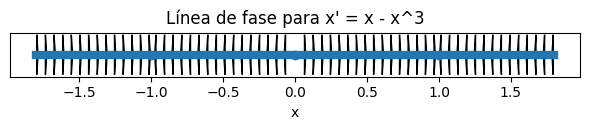

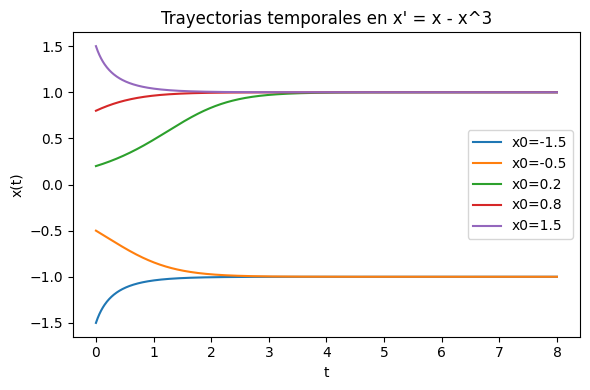

In [4]:
# ===============================================================
# Sección 2.2 — Fixed Points and Stability
# EDO: x' = x - x^3
# Objetivo:
#   1) Encontrar y clasificar los puntos fijos.
#   2) Visualizar la línea de fase (dirección del flujo en la recta).
#   3) Simular trayectorias desde varias condiciones iniciales para
#      observar convergencia/divergencia (estabilidad/inestabilidad).
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt

# ---------- Integrador RK4 1D -----------------------------------------------
def rk4(f, t0, x0, t1, h):
    """
    Integrador de Runge–Kutta de orden 4 para EDO 1D: x' = f(t, x).

    Parámetros:
        f  : función f(t, x) que define la ODE.
        t0 : tiempo inicial.
        x0 : valor inicial x(t0).
        t1 : tiempo final.
        h  : paso de integración (positivo).

    Devuelve:
        t : arreglo de tiempos (n+1 puntos, incluye t0 y ~t1).
        x : arreglo con la solución numérica correspondiente.
    """
    n = int(np.ceil((t1 - t0) / h))
    t = np.linspace(t0, t0 + n*h, n + 1)
    x = np.zeros_like(t)
    x[0] = x0
    for i in range(n):
        ti, xi = t[i], x[i]
        h_i = t[i+1] - t[i]  # paso efectivo (último puede ser distinto a h)
        k1 = f(ti,          xi)
        k2 = f(ti + 0.5*h_i, xi + 0.5*h_i*k1)
        k3 = f(ti + 0.5*h_i, xi + 0.5*h_i*k2)
        k4 = f(ti + h_i,     xi + h_i*k3)
        x[i+1] = xi + (h_i/6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return t, x

# ---------- Definición del sistema ------------------------------------------
def f(t, x):
    """Campo de la EDO: x' = x - x^3."""
    return x - x**3

def df_dx(x):
    """Derivada respecto a x: f'(x) = 1 - 3x^2 (para estabilidad lineal)."""
    return 1.0 - 3.0*x**2

# ---------- 1) Puntos fijos y estabilidad -----------------------------------
# Puntos fijos: resolver f(x)=0 => x - x^3 = 0 => x*(1 - x^2)=0 => x in {-1, 0, 1}
fixed_points = np.array([-1.0, 0.0, 1.0])

print("=== Clasificación de puntos fijos (linealización) ===")
for xstar in fixed_points:
    lam = df_dx(xstar)                # autovalor 1D de la linealización: u' = f'(x*) u
    if lam < 0:
        stab = "estable (atractor)"
        tau = 1.0/abs(lam)            # tiempo característico ~ 1/|f'(x*)|
        print(f"x* = {xstar: .1f} -> {stab}, f'(x*) = {lam: .1f}, tau ≈ {tau:.3f}")
    elif lam > 0:
        stab = "inestable (repulsor)"
        print(f"x* = {xstar: .1f} -> {stab}, f'(x*) = {lam: .1f}")
    else:
        stab = "neutro (caso no genérico)"
        print(f"x* = {xstar: .1f} -> {stab}, f'(x*) = {lam: .1f}")

# Esperado:
#   x*=-1: f'(-1)=1-3= -2 < 0  -> estable, tau=0.5
#   x*= 0: f'(0)=1             -> inestable
#   x*= 1: f'( 1)=1-3= -2 < 0  -> estable, tau=0.5

# ---------- 2) Línea de fase -------------------------------------------------
def phase_line_1d(f_scalar, xmin=-1.8, xmax=1.8, n=61):
    """
    Dibuja una línea horizontal y flechas orientadas según el signo de f(x).
    Marca los puntos fijos en la recta.
    """
    xs = np.linspace(xmin, xmax, n)
    v = np.sign([f_scalar(xi) for xi in xs])  # signo del campo en cada x
    fig, ax = plt.subplots(figsize=(6, 1.4))
    # Línea base (eje x estilizado)
    ax.plot(xs, np.zeros_like(xs), '-', linewidth=6)
    # Flechas (derecha si v>0, izquierda si v<0)
    dx = (xs[1] - xs[0]) * 0.25
    for xi, s in zip(xs, v):
        if s > 0:
            ax.arrow(xi, 0, dx, 0, head_width=0.05, head_length=dx*0.6, length_includes_head=True)
        elif s < 0:
            ax.arrow(xi, 0, -dx, 0, head_width=0.05, head_length=dx*0.6, length_includes_head=True)
    # Marcar puntos fijos
    ax.scatter(fixed_points, np.zeros_like(fixed_points), zorder=3)
    ax.set_yticks([])
    ax.set_xlabel("x")
    ax.set_title("Línea de fase para x' = x - x^3")
    plt.tight_layout()
    plt.show()

# Dibujar la línea de fase
phase_line_1d(lambda x: x - x**3)

# ---------- 3) Simulaciones desde varias condiciones iniciales ---------------
# Idea: mostrar cómo evoluciona x(t) según x0 y si converge a -1 o 1 (estables) o
#       se aleja de 0 (inestable).
x0_list = [-1.5, -0.5, 0.2, 0.8, 1.5]  # prueba con condiciones a ambos lados
T0, T1, H = 0.0, 8.0, 0.01             # intervalo y paso

plt.figure(figsize=(6, 4))
for x0 in x0_list:
    t, x = rk4(lambda _t, _x: f(_t, _x), T0, x0, T1, H)
    plt.plot(t, x, label=f"x0={x0}")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Trayectorias temporales en x' = x - x^3")
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 4) Comentarios e interpretación ----------------------------------
# - f(x) = x - x^3 es un polinomio impar, con tres ceros: -1, 0, 1.
# - La derivada f'(x)=1-3x^2 determina la estabilidad lineal:
#     * f'(-1) = -2 < 0 -> x*=-1 es estable (atractor).
#     * f'( 0) =  1 > 0 -> x*= 0 es inestable (repulsor).
#     * f'( 1) = -2 < 0 -> x*= 1 es estable (atractor).
# - En la línea de fase, las flechas apuntan hacia la derecha donde f(x)>0 y hacia
#   la izquierda donde f(x)<0. Se observa el “flujo” hacia -1 o 1, alejándose de 0.
# - En las simulaciones temporales:
#     * Si x0 ∈ (-∞, -1) ∪ (-1, 0): la solución tiende a -1.
#     * Si x0 ∈ (0, 1) ∪ (1, ∞): la solución tiende a 1.
#     * Si x0 = 0 exactamente, la trayectoria se queda en 0 (pero es inestable:
#       cualquier perturbación pequeña la saca hacia ±1).
# - Tiempo característico cerca de ±1: tau ≈ 1/|f'(±1)| = 1/2 = 0.5. Cerca del
#   punto fijo, |x(t)-x*| decae ~ e^{-2 t}.
#
# (Opcional) Para verificar ese decaimiento exponencial con una gráfica semilog:
#    x0_cerca = 0.7   # cerca de 1
#    t, x = rk4(lambda _t,_x: f(_t,_x), 0.0, x0_cerca, 4.0, 0.001)
#    u = np.abs(x - 1.0)
#    u_lin = u[0]*np.exp(-2.0*t)  # porque f'(1)=-2
#    import matplotlib.pyplot as plt
#    plt.figure(figsize=(6,4))
#    plt.semilogy(t, u, label="|x(t)-1| numérico")
#    plt.semilogy(t, u_lin, "--", label="|x0-1| e^{-2t}")
#    plt.xlabel("t"); plt.ylabel("|x(t)-1|")
#    plt.title("Decaimiento exponencial cerca de x*=1")
#    plt.legend(); plt.tight_layout(); plt.show()


Error máximo RK4 vs. exacta en [0.0,10.0] con H=0.01: 2.297e-09


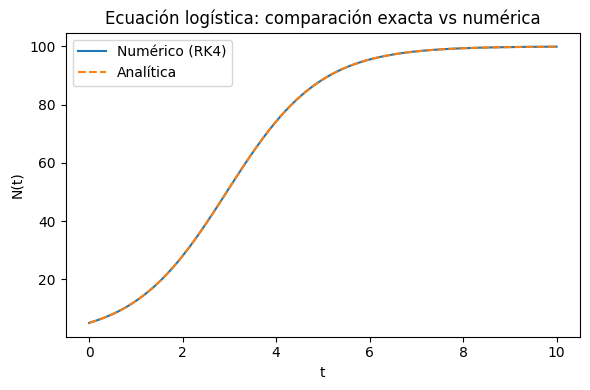

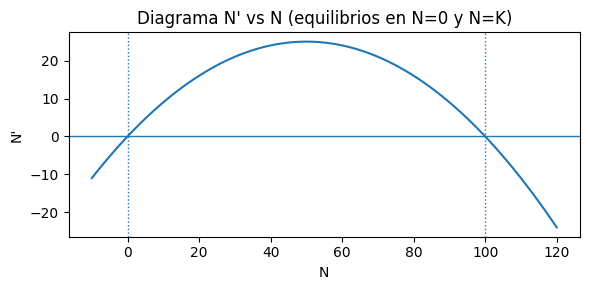

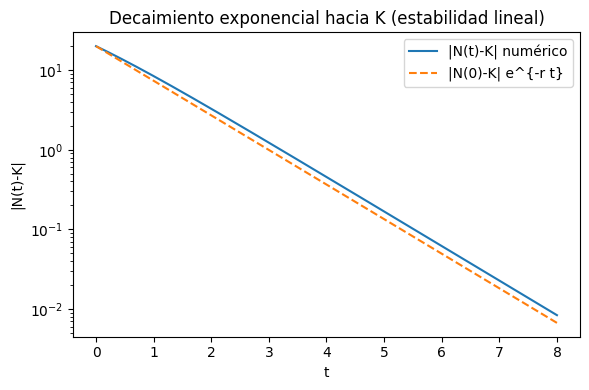

In [5]:
# ===============================================================
# Sección 2.3 — Population Growth
# EDO logística: N' = r N (1 - N/K)
# Objetivo:
#   1) Derivar y usar la SOLUCIÓN ANALÍTICA.
#   2) Comparar con una INTEGRACIÓN NUMÉRICA (RK4).
#   3) Mostrar la CURVA SIGMOIDAL N(t).
#   4) Graficar el DIAGRAMA N' vs N (equilibrios y signo del campo).
#   5) Verificar la aproximación EXPONENCIAL hacia K (estabilidad lineal).
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt

# ---------- 0) Parámetros del modelo -----------------------------------------
# r: tasa intrínseca de crecimiento. K: capacidad de carga. N0: población inicial.
r  = 1.0
K  = 100.0
N0 = 5.0

# Puedes cambiar r, K, N0 según el caso que quieras estudiar.


# ---------- 1) Integrador RK4 1D ---------------------------------------------
def rk4(f, t0, x0, t1, h):
    """
    Integrador de Runge–Kutta de orden 4 para EDO 1D: x' = f(t, x).

    Parámetros:
        f  : función f(t, x) que define la ODE.
        t0 : tiempo inicial.
        x0 : valor inicial x(t0).
        t1 : tiempo final.
        h  : paso de integración (positivo).

    Devuelve:
        t : arreglo de tiempos (n+1 puntos, incluye t0 y ~t1).
        x : arreglo con la solución numérica correspondiente.
    """
    n = int(np.ceil((t1 - t0) / h))
    t = np.linspace(t0, t0 + n*h, n + 1)
    x = np.zeros_like(t)
    x[0] = x0
    for i in range(n):
        ti, xi = t[i], x[i]
        h_i = t[i+1] - t[i]  # paso efectivo (el último puede diferir de h)
        k1 = f(ti,          xi)
        k2 = f(ti + 0.5*h_i, xi + 0.5*h_i*k1)
        k3 = f(ti + 0.5*h_i, xi + 0.5*h_i*k2)
        k4 = f(ti + h_i,     xi + h_i*k3)
        x[i+1] = xi + (h_i/6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return t, x


# ---------- 2) Definición del problema ---------------------------------------
def f_logistic(t, N):
    """Campo de la logística: N' = r N (1 - N/K)."""
    return r * N * (1.0 - N / K)

def fprime_logistic(N):
    """Derivada respecto a N (para estabilidad lineal): f'(N) = r(1 - 2N/K)."""
    return r * (1.0 - 2.0 * N / K)


# ---------- 3) Solución exacta (derivación breve en comentarios) -------------
# Separación de variables:
#   dN / [N(1 - N/K)] = r dt
# Fracciones parciales => ∫(1/N + 1/(K-N)) dN = r ∫ dt
# Tras integrar y despejar se obtiene la forma estándar:
#   N(t) = K / ( 1 + ((K - N0)/N0) * e^{-r t} )
def N_exact(t):
    """Solución analítica de la logística con N(0)=N0."""
    return K / (1.0 + ((K - N0) / N0) * np.exp(-r * t))


# ---------- 4) Comparación exacta vs numérica (curva sigmoidal) --------------
T0, T1, H = 0.0, 10.0, 0.01
t, N_num = rk4(f_logistic, T0, N0, T1, H)
N_an = N_exact(t)

# Error máximo en el intervalo (debe ser pequeño con RK4 y H fino)
err_max = float(np.max(np.abs(N_num - N_an)))
print(f"Error máximo RK4 vs. exacta en [{T0},{T1}] con H={H}: {err_max:.3e}")

# Gráfica N(t): se ve la típica S (sigmoide)
plt.figure(figsize=(6,4))
plt.plot(t, N_num, label="Numérico (RK4)")
plt.plot(t, N_an, "--", label="Analítica")
plt.xlabel("t")
plt.ylabel("N(t)")
plt.title("Ecuación logística: comparación exacta vs numérica")
plt.legend()
plt.tight_layout()
plt.show()


# ---------- 5) Diagrama N' vs N ----------------------------------------------
# Este diagrama (campo vs estado) muestra:
#   - Dónde N'=0 (equilibrios): N*=0 y N*=K.
#   - Signo de N': encima de la curva (positivo), debajo (negativo).
Ns = np.linspace(-10, 120, 300)   # incluimos algo negativo para ver el campo completo
plt.figure(figsize=(6,3))
plt.plot(Ns, r * Ns * (1.0 - Ns / K))   # N'(N)
plt.axhline(0.0, linewidth=1)
plt.axvline(0.0,  linewidth=1, linestyle=":")
plt.axvline(K,    linewidth=1, linestyle=":")
plt.xlabel("N")
plt.ylabel("N'")
plt.title("Diagrama N' vs N (equilibrios en N=0 y N=K)")
plt.tight_layout()
plt.show()

# Comentario:
#   - En (0, K): N' > 0 => la población crece.
#   - En (K, +∞): N' < 0 => decrece hacia K.
#   - N*=0  : f'(0)  = r  > 0  -> inestable.
#   - N*=K  : f'(K)  = -r < 0  -> estable (atractor).
#     Cerca de K, el error |N(t)-K| decae exponencialmente con tasa r.


# ---------- 6) Verificación de la estabilidad lineal cerca de K --------------
# Demostramos en semilog que |N(t)-K| ~ |N(0)-K| e^{-r t} cuando N está cerca de K.
t2, N2 = rk4(f_logistic, 0.0, 0.8*K, 8.0, 0.005)   # iniciar en 0.8K (cerca de K)
u   = np.abs(N2 - K)
u0  = u[0]
u_lin = u0 * np.exp(-r * t2)                       # predicción lineal

plt.figure(figsize=(6,4))
plt.semilogy(t2, u,     label="|N(t)-K| numérico")
plt.semilogy(t2, u_lin, "--", label="|N(0)-K| e^{-r t}")
plt.xlabel("t")
plt.ylabel("|N(t)-K|")
plt.title("Decaimiento exponencial hacia K (estabilidad lineal)")
plt.legend()
plt.tight_layout()
plt.show()


# ---------- 7) Notas finales --------------------------------------------------
# - Si N0 <= 0, la solución exacta sigue definida pero el modelo biológico pierde sentido
#   (población negativa/no física). Usualmente se toma N0>0.
# - r controla la rapidez: doble r => transitorios ~ 2 veces más rápidos.
# - K es el equilibrio estable (capacidad de carga).
# - Para diferentes escenarios, ajusta r, K, N0 arriba y vuelve a ejecutar.


=== Caso A: x' = sin(x) cerca de x*=pi ===
f'(x*) = -1.000,  tau esperado = 1.000


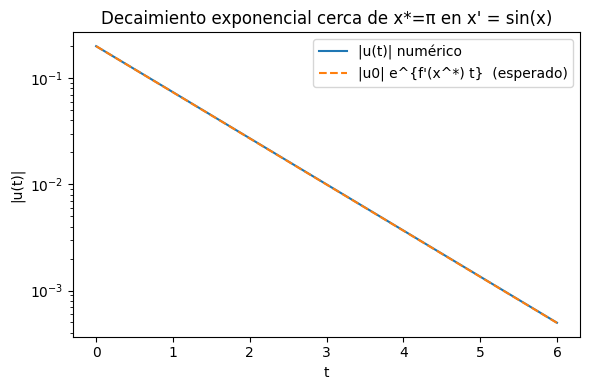


=== Caso B: Logística cerca de N*=K ===
f'(K) = -1.000,  tau esperado = 1.000


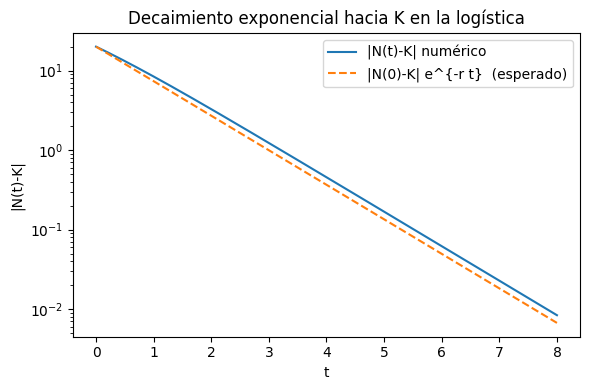

In [6]:
# ===============================================================
# Sección 2.4 — Linear Stability Analysis
# Idea central: Cerca de un punto fijo x* de x' = f(x),
#               si u = x - x*, entonces   u' ≈ f'(x*) u.
# => Solución local: u(t) ≈ u(0) e^{f'(x*) t}
# => Tiempo característico de relajación: tau = 1/|f'(x*)|.
# Verificamos con dos sistemas:
#   A) x' = sin(x)  cerca de x* = pi    -> f'(pi) = -1,  tau = 1
#   B) N' = r N (1 - N/K) cerca de N*=K -> f'(K)  = -r,  tau = 1/r
# ===============================================================

import numpy as np
import matplotlib.pyplot as plt

# ---------- Integrador RK4 1D -----------------------------------------------
def rk4(f, t0, x0, t1, h):
    """
    Integrador de Runge–Kutta de orden 4 para EDO 1D: x' = f(t, x).

    Parámetros:
        f  : función f(t, x).
        t0 : tiempo inicial.
        x0 : valor inicial x(t0).
        t1 : tiempo final.
        h  : paso de integración (positivo).

    Devuelve:
        t : arreglo de tiempos (n+1 puntos).
        x : arreglo con la solución numérica en cada t[i].
    """
    n = int(np.ceil((t1 - t0) / h))
    t = np.linspace(t0, t0 + n*h, n + 1)
    x = np.zeros_like(t); x[0] = x0
    for i in range(n):
        ti, xi = t[i], x[i]
        h_i = t[i+1] - t[i]  # paso efectivo
        k1 = f(ti,          xi)
        k2 = f(ti + 0.5*h_i, xi + 0.5*h_i*k1)
        k3 = f(ti + 0.5*h_i, xi + 0.5*h_i*k2)
        k4 = f(ti + h_i,     xi + h_i*k3)
        x[i+1] = xi + (h_i/6.0) * (k1 + 2*k2 + 2*k3 + k4)
    return t, x

# ---------- A) x' = sin(x) cerca de x* = pi ---------------------------------
def f_sin(t, x):
    return np.sin(x)

x_star = np.pi             # punto fijo (estable)
lam_A  = np.cos(x_star)    # f'(x*) = cos(x*) = -1
tau_A  = 1.0/abs(lam_A)    # tiempo característico esperado (=1)

# Simulamos empezando "cerca" de x*=pi (pequeña perturbación)
x0 = x_star + 0.2
t, x = rk4(f_sin, 0.0, x0, 6.0, 0.001)
u = x - x_star             # desviación respecto al punto fijo
u0 = u[0]
u_lin = u0 * np.exp(lam_A * t)   # predicción lineal u(t) ~ u0 e^{f'(x*) t}

print("=== Caso A: x' = sin(x) cerca de x*=pi ===")
print(f"f'(x*) = {lam_A:.3f},  tau esperado = {tau_A:.3f}")

# Gráfica en escala semilog de |u(t)| y la predicción e^{f'(x*) t}
plt.figure(figsize=(6,4))
plt.semilogy(t, np.abs(u), label="|u(t)| numérico")
plt.semilogy(t, np.abs(u_lin), "--", label=r"|u0| e^{f'(x^*) t}  (esperado)")
plt.xlabel("t"); plt.ylabel("|u(t)|")
plt.title("Decaimiento exponencial cerca de x*=π en x' = sin(x)")
plt.legend(); plt.tight_layout(); plt.show()

# ---------- B) Logística N' = r N (1 - N/K) cerca de N* = K ------------------
r, K = 1.0, 100.0
def f_logistic(t, N):
    return r * N * (1.0 - N / K)

N_star = K
lam_B  = -r            # f'(K) = -r
tau_B  = 1.0/abs(lam_B)

# Partimos cerca de K para ver el régimen lineal
N0 = 0.8 * K
t2, N = rk4(f_logistic, 0.0, N0, 8.0, 0.005)
u = N - N_star
u0 = u[0]
u_lin = u0 * np.exp(lam_B * t2)  # predicción lineal: e^{-r t}

print("\n=== Caso B: Logística cerca de N*=K ===")
print(f"f'(K) = {lam_B:.3f},  tau esperado = {tau_B:.3f}")

plt.figure(figsize=(6,4))
plt.semilogy(t2, np.abs(u), label="|N(t)-K| numérico")
plt.semilogy(t2, np.abs(u_lin), "--", label=r"|N(0)-K| e^{-r t}  (esperado)")
plt.xlabel("t"); plt.ylabel("|N(t)-K|")
plt.title("Decaimiento exponencial hacia K en la logística")
plt.legend(); plt.tight_layout(); plt.show()

# ---------- Comentarios finales ---------------------------------------------
# * En ambos casos, en la vecindad del punto fijo, el error |u(t)| decae
#   de forma exponencial con tasa |f'(x*)|, validando u' ≈ f'(x*) u.
# * El tramo "lineal" es más nítido cuanto más cerca arranques del punto fijo.
# * tau reporta el tiempo típico en el que |u| cae ~e^{-1} (~37% del valor inicial).
